Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [47]:
NAME = "Magali"
COLLABORATORS = "NA"

---

# CS110 Pre-class Work 5.2

## Question 1.
Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

1. [1,5,6,2,3,4,7,9,8]
2. 6

## Question 2.
Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [79]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    x = A[r]
    i = p-1
    for j in range(p, r):
        if A[j] <= x:
            i = i + 1
            temp = A[i]
            A[i] = A[j]
            A[j] = temp
    tempr = A[r]
    A[r] = A[i+1]
    A[i+1] = tempr
    return i+1
            
    raise NotImplementedError()

In [80]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3.

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [81]:
def quick_sort(A,p,r):
    if p < r:
        q = partition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)
    #raise NotImplementedError()

In [82]:
# test case 1
A = [0]
quick_sort(A, 0, 0)
A

[0]

In [83]:
# test case 2
A = [3,1,2]
quick_sort(A, 0, 2)
A

[1, 2, 3]

The above test cases work when I run them myself but for some reason the quick_sort assertions below still return an error.

In [84]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

AssertionError: 

## Question 4. 
Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


In [192]:
# import relevant libraries
import numpy as np # for Question 2, 3, 4, 5
from matplotlib import pyplot as plt  # for Question 6 and 7
import time # for Question 6 and 7
import random # for Question 6 and 7

In [193]:
def practical_run_times_simulation(input_sizes, algo_name, full_name, same):
    # input_sizes = [1, 4, 10, 50, 100, 250, 500, 750, 1000, 5000]
    ttl_test_times = np.empty(len(input_sizes))
    for i in range(0, 100):  # run a 100 simulations for each size
        if same == True:
            test_arrays = create_input_same(input_sizes)
        else:
            test_arrays = create_input_descending(input_sizes)
        test_times = run_time(test_arrays, algo_name)
        ttl_test_times = np.add(ttl_test_times, test_times)
    # print(ttl_test_times)
    avg_test_times = ttl_test_times / i 
    # print(avg_test_times)
    graph_run_time(input_sizes, ttl_test_times, full_name)

In [194]:
def create_input_same(sizes_arr):
    sample_arrays = []
    for i in range(0, len(sizes_arr)):
        sample_arrays.append([random.randint(0,100000)]*sizes_arr[i])
    return(sample_arrays)

In [195]:
def create_input_descending(sizes_arr):
    sample_arrays = []
    for i in range(0, len(sizes_arr)):
        sample_arrays.append(list(reversed(range(sizes_arr[i]))))
    return(sample_arrays)

In [196]:
# Get run time for three-way merge
def run_time(input_arr, algo_to_test):
    """Tracks run time
    input_arr: a 2D array/list of lists that has lists of different sizes
    """
    record_times = []
    for i in range(0, len(input_arr)):
        start_time = time.time()
        algo_to_test(input_arr[i], 0, len(input_arr[i])-1) # two extra elements added for quicksort
        time_elapsed = (time.time() - start_time)*1000
        record_times.append(time_elapsed)
    return(record_times)
# raise NotImplementedError()

In [197]:
def graph_run_time(input_size, run_time, algo_name_str):
    """Graphs the run time relative to input size
    
    input_size: a list of integers
    run_time: a list of floats (representing time in seconds), same size as list above
    algo_name: a string
    """
    plt.plot(input_size, run_time) # plot the two lists
    
    plt.ylabel("Running Time (milliseconds)") # add y-label
    plt.xlabel("Input Size") # add x-label
    
    title = "Practical Run Time of " + algo_name_str
    plt.title(title)

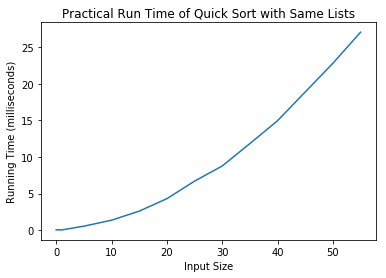

In [207]:
# Get run time for quick_sort w/ same lists & small input sizes
input_sizes = [0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 50, 55]
practical_run_times_simulation(input_sizes, quick_sort, "Quick Sort with Same Lists", True)


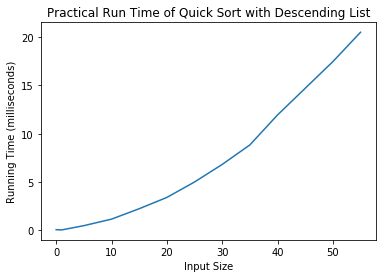

In [208]:
# Get run time for quick_sort w/ descending lists & small input sizes
input_sizes = [0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 50, 55]
practical_run_times_simulation(input_sizes, quick_sort, "Quick Sort with Descending List", False)


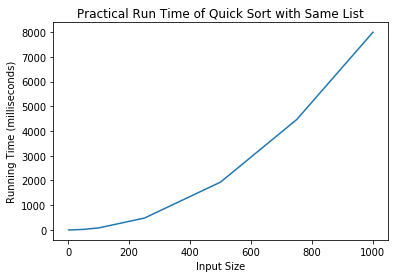

In [209]:
# Get run time for quick_sort w/ same lists & large input sizes
input_sizes = [1, 4, 10, 50, 100, 250, 500, 750, 1000]
practical_run_times_simulation(input_sizes, quick_sort, "Quick Sort with Same List", True)

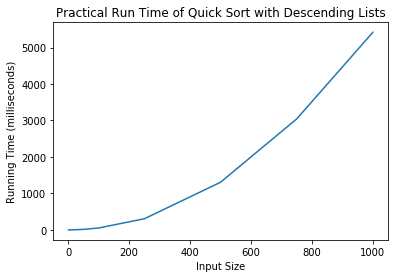

In [210]:
# Get run time for quick_sort w/ descending lists & large input sizes
input_sizes = [1, 4, 10, 50, 100, 250, 500, 750, 1000]
practical_run_times_simulation(input_sizes, quick_sort, "Quick Sort with Descending Lists", False)


The algorithm quicksort is inefficient when receiving lists of the same input. It performs worse in terms of running time than if the lists are in descending order. 